<a href="https://colab.research.google.com/github/Forrward/LABbl/blob/main/lab2/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 2

In [40]:
!pip install pandas
!pip install seaborn

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.cluster import DBSCAN
import numpy as np

##Введение в описательную статистику

1. Выберите категориальную целевую переменную (**Y**)

2. Выберите переменную для анализа относительно категории (**X**)

3. Выведитие обобщенную статистическую информацию переменной (**X**)

2. Вычислите среднее, медиану, моду, минимум, максимум, стандартное отклонение относительно целевой пременной из файла Classification datasets в соответствии с вашим вариантом

3. Сделайте вывод относительно полученных результатов

p.s если у вас нет категориальных признаков - преобразуйте любой числовой в категориальный (https://pandas.pydata.org/docs/reference/api/pandas.cut.html). Важно **не** использовать преобразованный Y вместе с этим же X (то есть, если вы преобразовали возраст в категорию, то вы не моежет использовать возраст в качестве X и возраст категорию в качестве Y)

In [42]:
# чтение файла
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [43]:
# ваш код здесь
sex = df.groupby(['Sex'])
describe = sex['RestingBP'].describe()
describe

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,193.0,132.212435,19.392638,94.0,120.0,130.0,140.0,200.0
M,725.0,132.445517,18.286739,0.0,120.0,130.0,140.0,200.0


In [44]:
des_sex = df.dropna()

des_sex = des_sex[(des_sex.RestingBP > 1) & (des_sex.RestingBP < 200)]
des_sex = des_sex.reset_index(drop=True)

des_sex2 = des_sex.groupby(['Sex'])
describe2 = des_sex2['RestingBP'].describe()

describe2

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,191.0,131.502618,18.197708,94.0,120.0,130.0,140.0,180.0
M,722.0,132.441828,17.286043,80.0,120.0,130.0,140.0,192.0


In [45]:
# (среднее) ваш код здесь
mean = des_sex['RestingBP'].mean()
mean

132.24534501642935

In [46]:
# (медиана) ваш код здесь
median = des_sex['RestingBP'].median()
median

130.0

In [47]:
# (мода) ваш код здесь
mode = df['RestingBP'].mode()
mode

0    120
Name: RestingBP, dtype: int64

In [48]:
# (минимум) ваш код здесь
min = des_sex['RestingBP'].min()
min

80

In [49]:
# (максимум) ваш код здесь
max = des_sex['RestingBP'].max()
max

192

In [50]:
# (стандартное отклонение) Ваш код здесь
std = des_sex['RestingBP'].std()
std

17.474701096643038

Вычислите следующие квантили: 25%, 50% (медиана), 75% для числового признака вашего датасета. Затем найдите интерквартильный размах.

In [51]:
q1 = des_sex['RestingBP'].quantile(.25) # (25% квантиль) ваш код здесь
q1

120.0

In [52]:
q2 = des_sex['RestingBP'].quantile(.50) # (50% квантиль) ваш код здесь
q2

130.0

In [53]:
q3 = des_sex['RestingBP'].quantile(.75) # (75% квантиль) ваш код здесь
q3

140.0

In [54]:
iqr = q3 - q1 # (интерквартильный размах) ваш код здесь
iqr

20.0

Какие выводы можно сделать исходя из полученных статистических данных?

**Ответ здесь**

1) У женщин имеется более низкая средняя частота сердечного ритма по сравнению с мужчинами, но у мужчин более широкий диапазон минимального и максимального пульса.

2) Разница между стандартным отклонением и средними значениями явно указывает на значительный разброс в частоте сердечных сокращений как у мужчин, так и у женщин.

3) Обследовано больше мужчин, чем женщин, что может указывать на увеличенный риск сердечно-сосудистых заболеваний у мужчин.

##Основы визуализации

 Постройте гистограмму переменной (X) относительно категориального признака (Y) из своего датасета.

Text(0, 0.5, 'Частота')

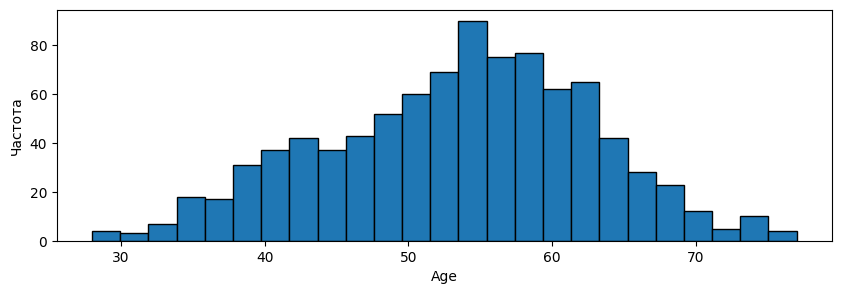

In [55]:
plt.figure(figsize=(10, 3))
plt.hist(des_sex['Age'], bins=25, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Частота')

В основном люди проходят обследования в возрасте от 40 до 65 лет.

Постройте boxplot любого признака из своего датасета.

1) boxplot числовой переменной;

2) boxplot числовой переменной относительно категориальный переменной;

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

Text(0.5, 0, 'Age')

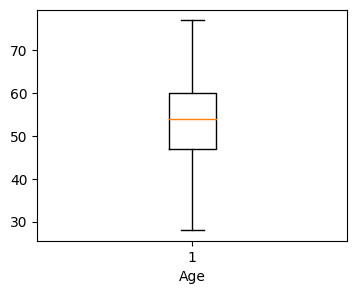

In [56]:
plt.figure(figsize=(4, 3))
plt.boxplot(des_sex['Age'])
plt.xlabel('Age')

<ipython-input-59-ca6f28b5f918>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age'] = pd.factorize(df2['Age'])[ 0 ]


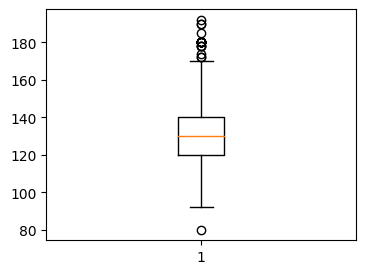

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
908,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
909,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
910,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
911,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


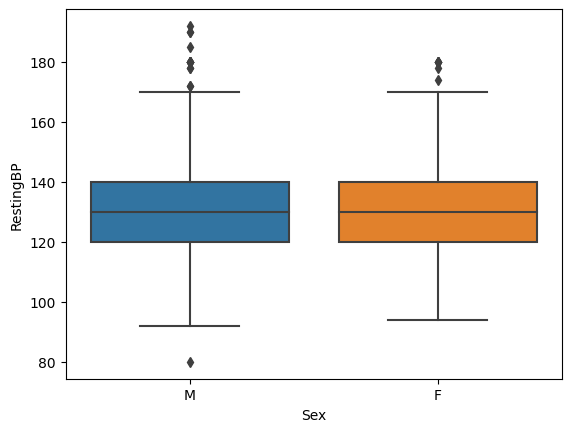

In [59]:
df2['Age'] = pd.factorize(df2['Age'])[ 0 ]
df2 = des_sex[['Age', 'RestingBP']]
plt.figure(figsize=(4, 3))
plt.boxplot(des_sex['RestingBP'])
plt.show()
sns.boxplot(x=des_sex['Sex'], y=des_sex['RestingBP'])
des_sex

Несмотря на ранее выявленный выброс, на графике можно наблюдать отклонения от нормы. Однако, оценить их как аномалии сложно, так как каждый человек имеет свои индивидуальные особенности организма, и пульс во время обследования может быть и высоким, и низким.

Постройте диаграмму рассеивания для числовых признаков вашего датасета.

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

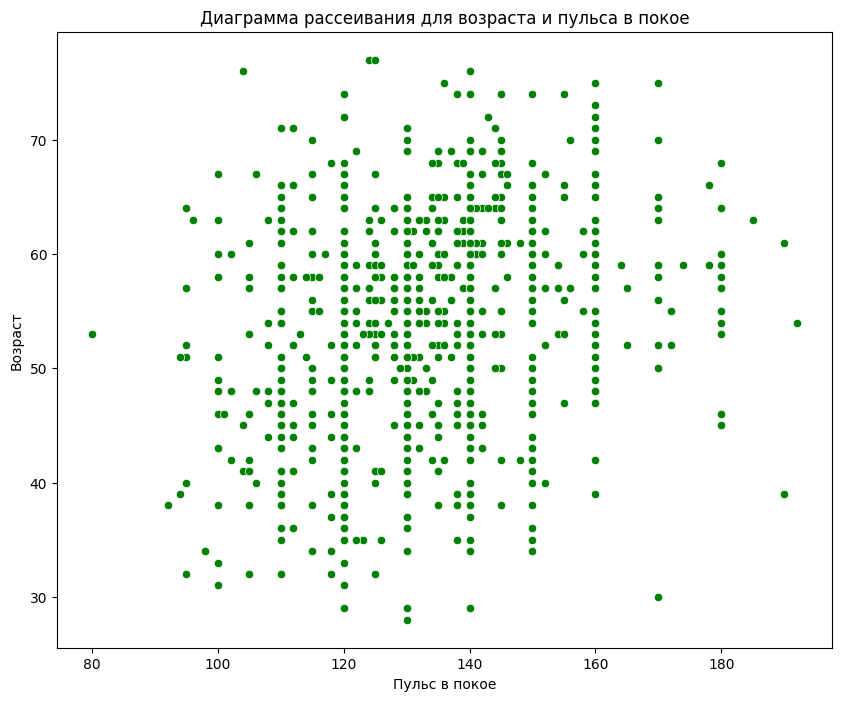

,Age,RestingBP
0,40,140
1,49,160
2,37,130
3,48,138
4,54,150
...,...,...
908,45,110
909,68,144
910,57,130
911,57,130


In [31]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='RestingBP', y='Age', data=des_sex, color='green')
plt.title('Диаграмма рассеивания для возраста и пульса в покое')
plt.xlabel('Пульс в покое')
plt.ylabel('Возраст')
plt.show()
df2

Применяется диаграмма рассеивания пульса к возрасту, так как по отношению к полу, будет схожа на boxplot.

Постройте матрицу корреляции для двух числовых признаков вашего датасета.

<Axes: >

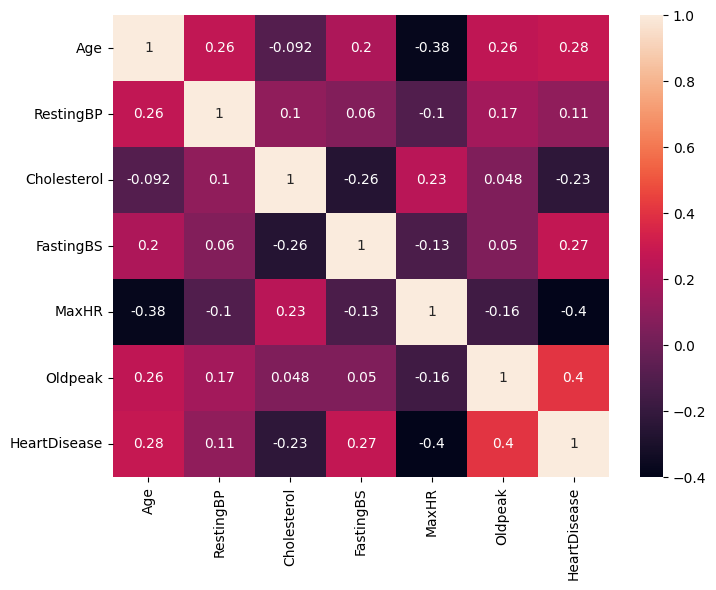

In [35]:
#ваш код здесь
des_sex = des_sex.select_dtypes(include=np.number)
plt.figure(figsize=(8, 6))
sns.heatmap(des_sex.corr(), annot=True)

Какие выводы можно сделать на основе графиков и матрицы корреляции?

**Ответ здесь**

После анализа матрицы корреляции можно заметить, что между значениями существует очень слабая связь, обычно менее 0,5. Тем не менее, при рассмотрении представленных данных, можно сказать, что относительно них, сильную связь демонстрируют пары показателей: "HeartDisease-Oldpeak" и "Cholesterol-Oldpeak". Наименее выраженная связь наблюдается между "MaxHR" и "HeartDisease". Следует учитывать, что это относится к представленным данным.

##Задание для гениев*

Реализовать следующие методы поиска выбросов:
1. На основе среднего и отклонения
2. Критерий Шовене
3. С помощью квартилей
4. Поиск выбросов по двум переменным

[Посмотреть](http://course.omgtu.ru/wp-content/uploads/2021/04/3_%D0%92%D1%8B%D0%B1%D1%80%D0%BE%D1%81%D1%8B.pdf)

P.S. в качестве возвразаемого значения методов может быть:
1. очищенный датафрейм
2. индексы выбросов ```df.series.index```

In [ ]:
"""

Ваш код здесь

"""

### Пример реализации одного метода

In [ ]:
from statistics import median, mean

class Outline:
  def __init__(self, df):
    self.df = df

  def delete_outline_by_mean(self, column_name):
    mean_data = mean(self.df[column_name])
    maximum = mean_data * 2
    result = []

    for item in self.df[column_name]:
      if abs(item - mean_data) < maximum:
        result.append(item)

    return result



In [ ]:
data = pd.DataFrame(
    data = {
        "col1": [1, 2, 3, 4, 5, 1000],
        "col2": [1, 2, 3, 2, 1, 4]
    }
)

so = Outline(data)
so.delete_outline_by_mean("col1")

[1, 2, 3, 4, 5]